In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

# Load the dataset
df = pd.read_excel('../data/Bank_Churn.xlsx')
df = df.head(5000).copy()

#! EDA
print(Fore.LIGHTBLUE_EX + "First 5 rows of the dataset: \n" + Fore.RESET, end=" ")
print(df.head())

First 5 rows of the dataset: 
    CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  


In [3]:
print(Fore.LIGHTBLUE_EX + "Information about the dataset: " + Fore.RESET)
print(df.info())

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       5000 non-null   int64  
 1   Surname          5000 non-null   object 
 2   CreditScore      5000 non-null   int64  
 3   Geography        5000 non-null   object 
 4   Gender           5000 non-null   object 
 5   Age              5000 non-null   int64  
 6   Tenure           5000 non-null   int64  
 7   Balance          5000 non-null   float64
 8   NumOfProducts    5000 non-null   int64  
 9   HasCrCard        5000 non-null   int64  
 10  IsActiveMember   5000 non-null   int64  
 11  EstimatedSalary  5000 non-null   float64
 12  Exited           5000 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 507.9+ KB
None


In [4]:

print(Fore.LIGHTBLUE_EX + "Missing Values: " + Fore.RESET)
print(df.isnull().sum())
print(Fore.LIGHTBLUE_EX + "\nColumns: " + Fore.RESET)
print(df.columns.tolist() , "\n")

Missing Values: 
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Columns: 
['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] 



In [5]:
# ! Check for duplicates
duplicates = df.duplicated().sum()
print(f'{Fore.LIGHTBLUE_EX}Duplicates:{Fore.RESET} {duplicates}')

print(Fore.LIGHTBLUE_EX + "Statistical Summary: " + Fore.RESET)
print(df.describe())

Duplicates: 0
Statistical Summary: 
         CustomerId  CreditScore          Age       Tenure        Balance  \
count  5.000000e+03  5000.000000  5000.000000  5000.000000    5000.000000   
mean   1.569033e+07   650.245400    38.988600     5.009200   77051.932626   
std    7.158643e+04    97.529306    10.598327     2.879579   62417.714791   
min    1.556570e+07   350.000000    18.000000     0.000000       0.000000   
25%    1.562816e+07   582.000000    32.000000     3.000000       0.000000   
50%    1.569001e+07   652.000000    37.000000     5.000000   97466.985000   
75%    1.575235e+07   717.250000    44.000000     7.000000  128032.042500   
max    1.581566e+07   850.000000    88.000000    10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count    5000.000000  5000.000000      5000.00000      5000.000000   
mean        1.523200     0.708600         0.51000    100343.748618   
std         0.582005     0.454453         0.49995     57708.

In [6]:
print(Fore.LIGHTBLUE_EX + "Data Types: " + Fore.RESET)
print(df.dtypes)
print(Fore.LIGHTBLUE_EX + "\nUnique Values: " + Fore.RESET)
print(df.nunique())

Data Types: 
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Unique Values: 
CustomerId         5000
Surname            2048
CreditScore         443
Geography             3
Gender                2
Age                  68
Tenure               11
Balance            3214
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    4999
Exited                2
dtype: int64


In [7]:
# ! Outlier detection using IQR method

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_summary_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier_Count'])

print(outlier_summary_df)

            Column  Outlier_Count
0      CreditScore              9
1              Age            180
2           Tenure              0
3          Balance              0
4    NumOfProducts             31
5  EstimatedSalary              0


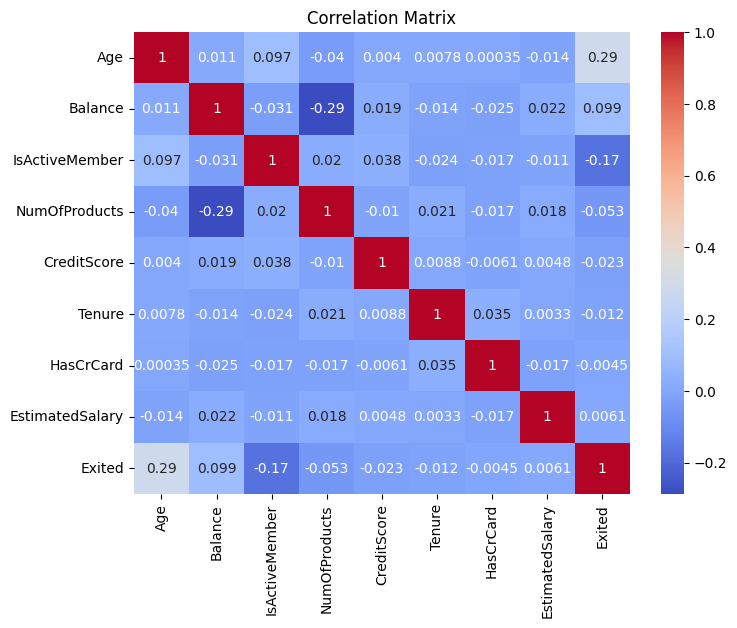

In [8]:
# ! Correlation matrix to identify relationships between features
plt.figure(figsize=(8, 6)) 
selected_columns = ['Age', 'Balance', 'IsActiveMember','NumOfProducts','CreditScore','Tenure','HasCrCard' ,'EstimatedSalary', 'Exited']
sns.heatmap(df[selected_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

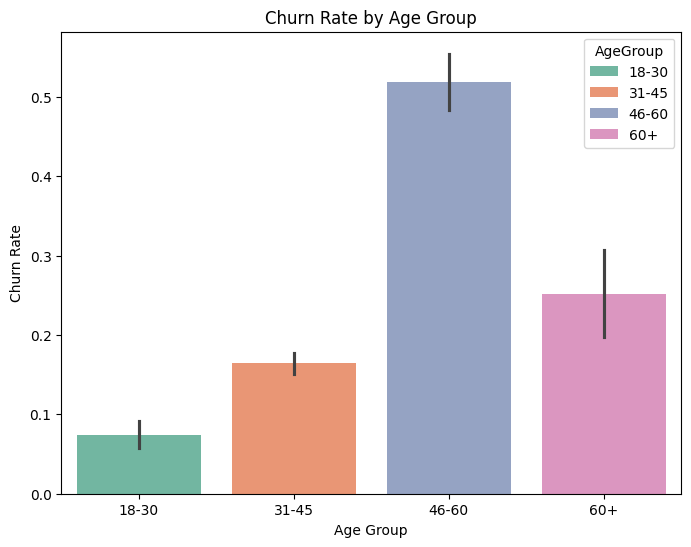

In [9]:
# ! Objective 1: Explore how customer background affects churn
# Age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 92], labels=['18-30', '31-45', '46-60', '60+'])

# Churn by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Exited', hue='AgeGroup', data=df, palette='Set2')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()

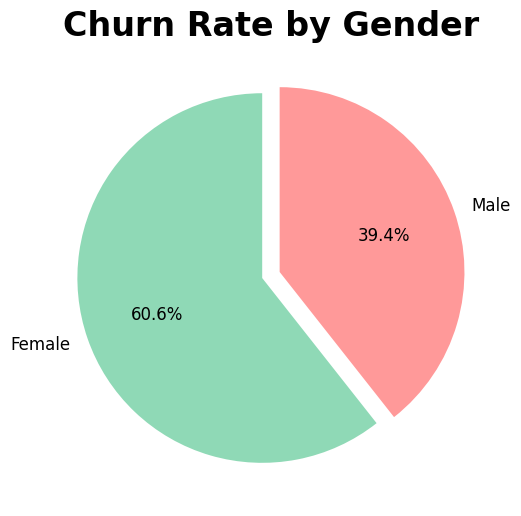

In [10]:
# Churn by Gender
gender_churn = df.groupby('Gender')['Exited'].mean()
plt.figure(figsize=(8, 6))
plt.pie(
    gender_churn, 
    labels=gender_churn.index, 
    autopct='%1.1f%%', 
    colors=['#8fd9b6', '#ff9999'], 
    startangle=90, 
    explode=(0.05, 0.05), 
    textprops={'fontsize': 12}
)
plt.title('Churn Rate by Gender', fontsize=24, fontweight='bold')  
plt.show()

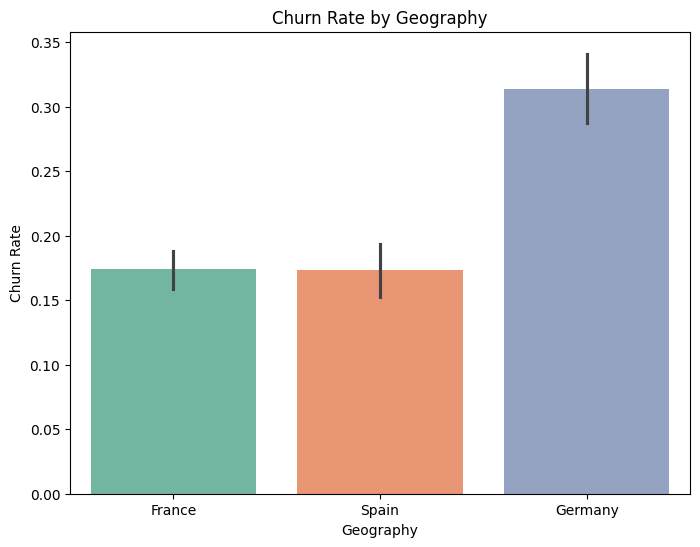

In [11]:
# Churn by Geography
plt.figure(figsize=(8, 6))
sns.barplot(x='Geography', y='Exited', hue='Geography', data=df, palette='Set2')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()

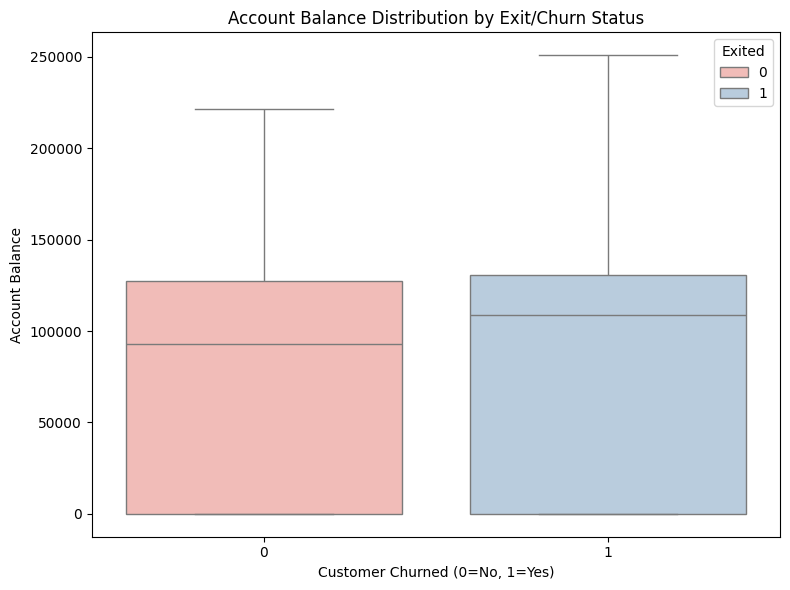

In [12]:
# ! Objective 2: Look into financial habits and their impact – Find out whether factors like how much money a customer keeps in their account or how many products they use influence their decision to stay or leave.

# Box Plot for Balance vs Exited
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="Balance", hue="Exited", data=df, palette="Pastel1")
plt.title("Account Balance Distribution by Exit/Churn Status")
plt.xlabel('Customer Churned (0=No, 1=Yes)')
plt.ylabel('Account Balance')
plt.tight_layout()
plt.show()

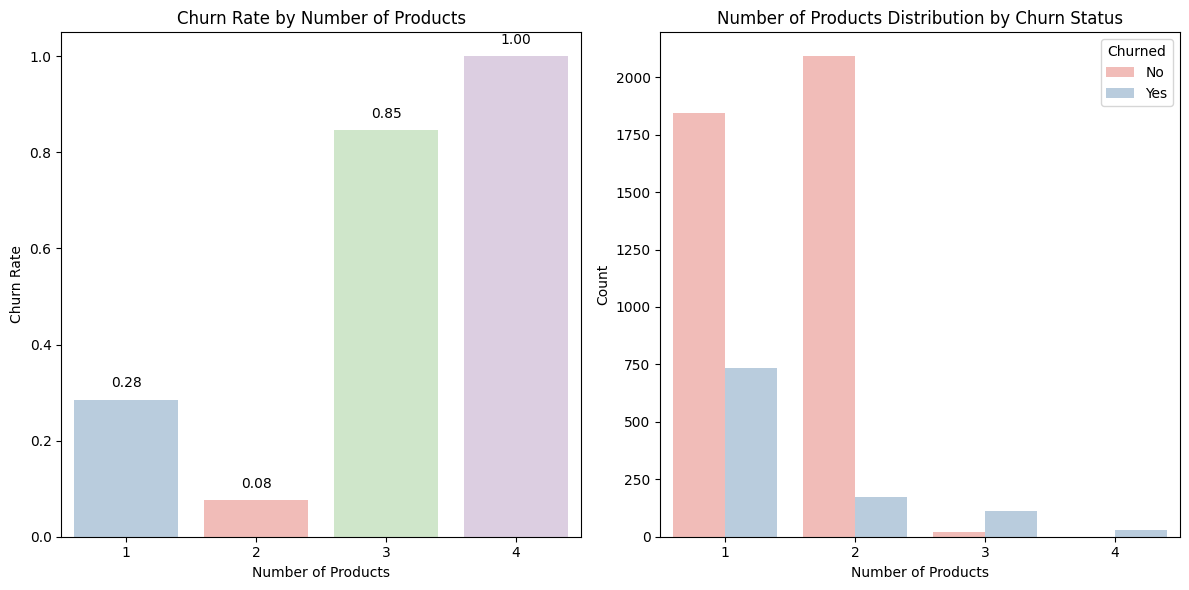

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Churn Rate by Number of Products

product_churn = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
sns.barplot(ax=axes[0], x='NumOfProducts', y='Exited', hue='Exited', data=product_churn, palette='Pastel1', legend=False)
axes[0].set_title('Churn Rate by Number of Products')
axes[0].set_xlabel('Number of Products')
axes[0].set_ylabel('Churn Rate')

for index, row in product_churn.iterrows():
    axes[0].text(row['NumOfProducts'] - 1, row['Exited'] + 0.02, f"{row['Exited']:.2f}", ha='center', va='bottom', fontsize=10)


# Distribution of products by churn status

sns.countplot(ax=axes[1], x='NumOfProducts', hue='Exited', data=df, palette='Pastel1')
axes[1].set_title('Number of Products Distribution by Churn Status')
axes[1].set_xlabel('Number of Products')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churned', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

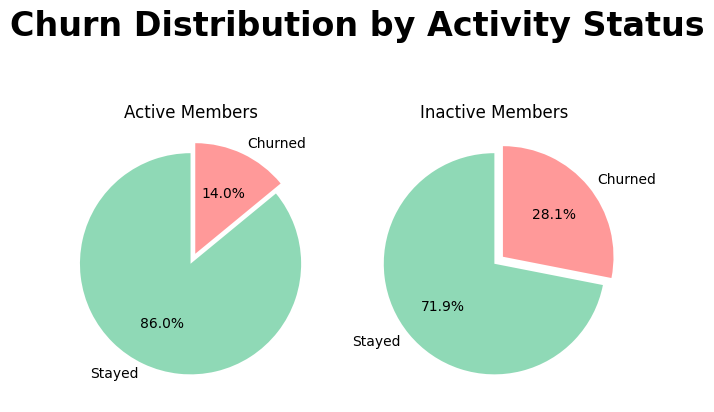

In [14]:
# ! Objective 3: Examine engagement levels - Analyze if being an active user or owning a credit card has any connection with whether customers choose to churn.

# Pie charts showing the proportion of churned vs. stayed customers for active and inactive members

plt.subplot(1, 2, 1) 

active_members = df[df['IsActiveMember'] == 1]['Exited'].value_counts() 
plt.pie(active_members, labels=['Stayed', 'Churned'], autopct='%1.1f%%', colors=['#8fd9b6', '#ff9999'], 
         startangle=90, explode=(0, 0.1))
plt.title('Active Members')

plt.subplot(1, 2, 2)
inactive_members = df[df['IsActiveMember'] == 0]['Exited'].value_counts()
plt.pie(inactive_members, labels=['Stayed', 'Churned'], autopct='%1.1f%%', colors=['#8fd9b6', '#ff9999'], 
       startangle=90, explode=(0, 0.1))
plt.title('Inactive Members')

plt.suptitle('Churn Distribution by Activity Status', fontsize=24, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

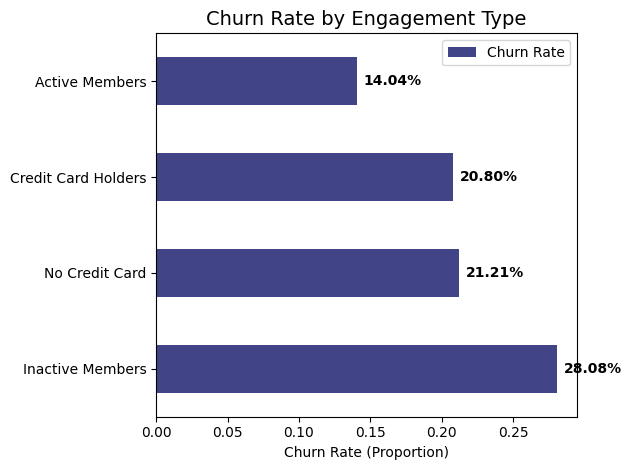

In [15]:
# Churn Rate on the basis of engagement types

engagement_churn = pd.DataFrame({
    'Active Members': [df[df['IsActiveMember'] == 1]['Exited'].mean()],
    'Inactive Members': [df[df['IsActiveMember'] == 0]['Exited'].mean()],
    'Credit Card Holders': [df[df['HasCrCard'] == 1]['Exited'].mean()],
    'No Credit Card': [df[df['HasCrCard'] == 0]['Exited'].mean()]
})

engagement_churn = engagement_churn.T
engagement_churn.columns = ['Churn Rate']

engagement_churn.sort_values('Churn Rate', ascending=False).plot(
    kind='barh', 
    color=sns.color_palette('viridis', 4)
)

plt.title('Churn Rate by Engagement Type', fontsize=14)
plt.xlabel('Churn Rate (Proportion)', fontsize=10)

for i, v in enumerate(engagement_churn.sort_values('Churn Rate', ascending=False)['Churn Rate']):
    plt.text(v + 0.005, i, f'{v:.2%}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

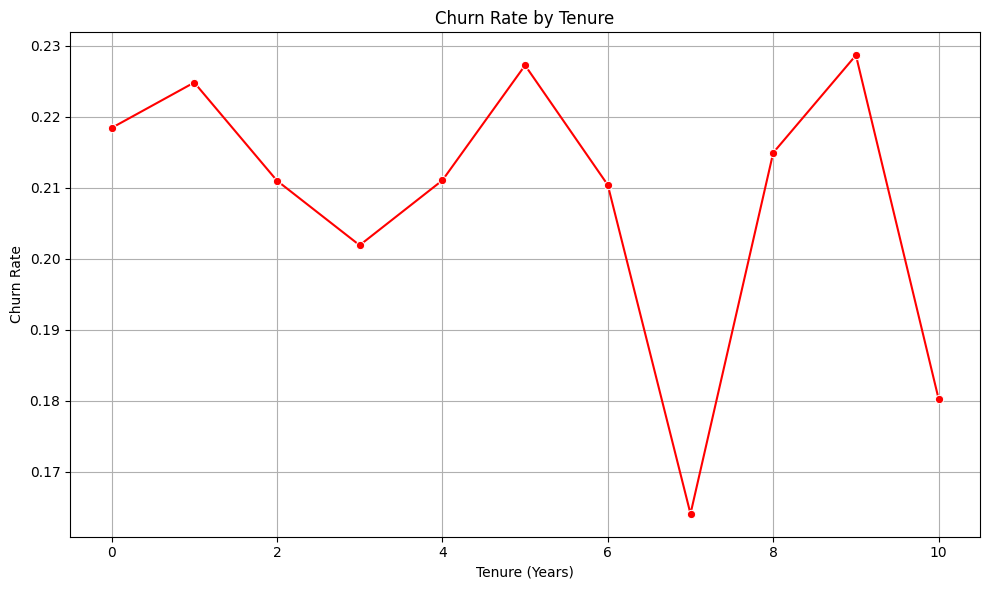

In [16]:
# ! Objective 4: Investigate the impact of customer tenure on churn – Determine if the length of time a customer has been with the bank influences their likelihood to leave.

# Churn rate by tenure

tenure_churn_rate = df.groupby("Tenure")["Exited"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=tenure_churn_rate, x="Tenure", y="Exited", marker="o", color="red")
plt.title("Churn Rate by Tenure")
plt.xlabel("Tenure (Years)")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

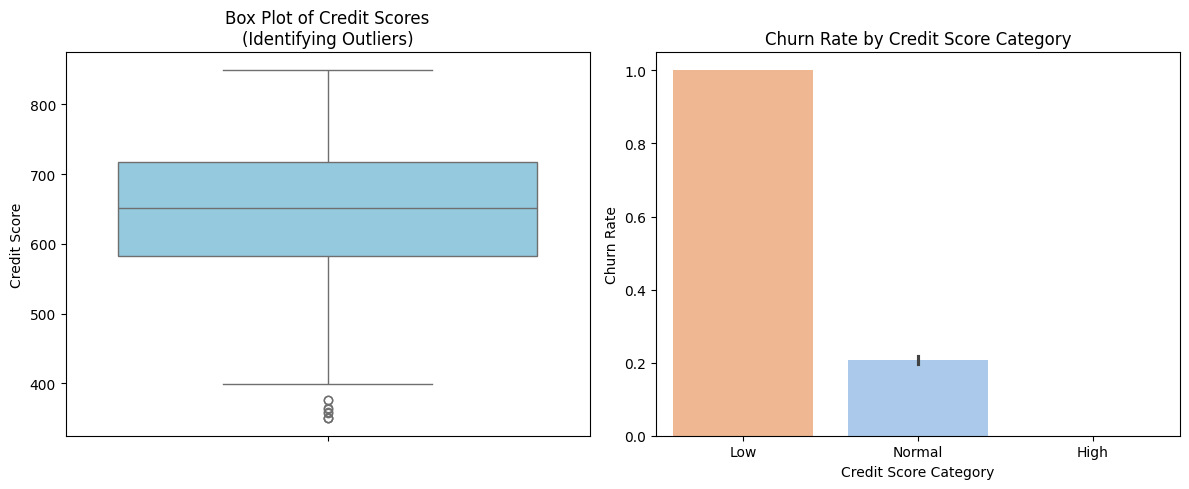

In [17]:
# ! Objective 5: Spot unusual credit behaviors – Identify customers with unusually high or low credit scores and see if those outliers are more likely to leave.

Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['CreditScoreCategory'] = 'Normal'
df.loc[df['CreditScore'] < lower_bound, 'CreditScoreCategory'] = 'Low'
df.loc[df['CreditScore'] > upper_bound, 'CreditScoreCategory'] = 'High'

plt.figure(figsize=(12, 5))

# Subplot 1: Box Plot for CreditScore to Spot Outliers
plt.subplot(1, 2, 1)
sns.boxplot(y='CreditScore', data=df, color='skyblue')
plt.title('Box Plot of Credit Scores\n(Identifying Outliers)')
plt.ylabel('Credit Score')

# Subplot 2: Bar Plot for Churn Rate by CreditScore Category
plt.subplot(1, 2, 2)
sns.barplot(x='CreditScoreCategory', y='Exited', data=df, hue='CreditScoreCategory',
            estimator=lambda x: sum(x) / len(x), palette='pastel',
            order=['Low', 'Normal', 'High'])
plt.title('Churn Rate by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

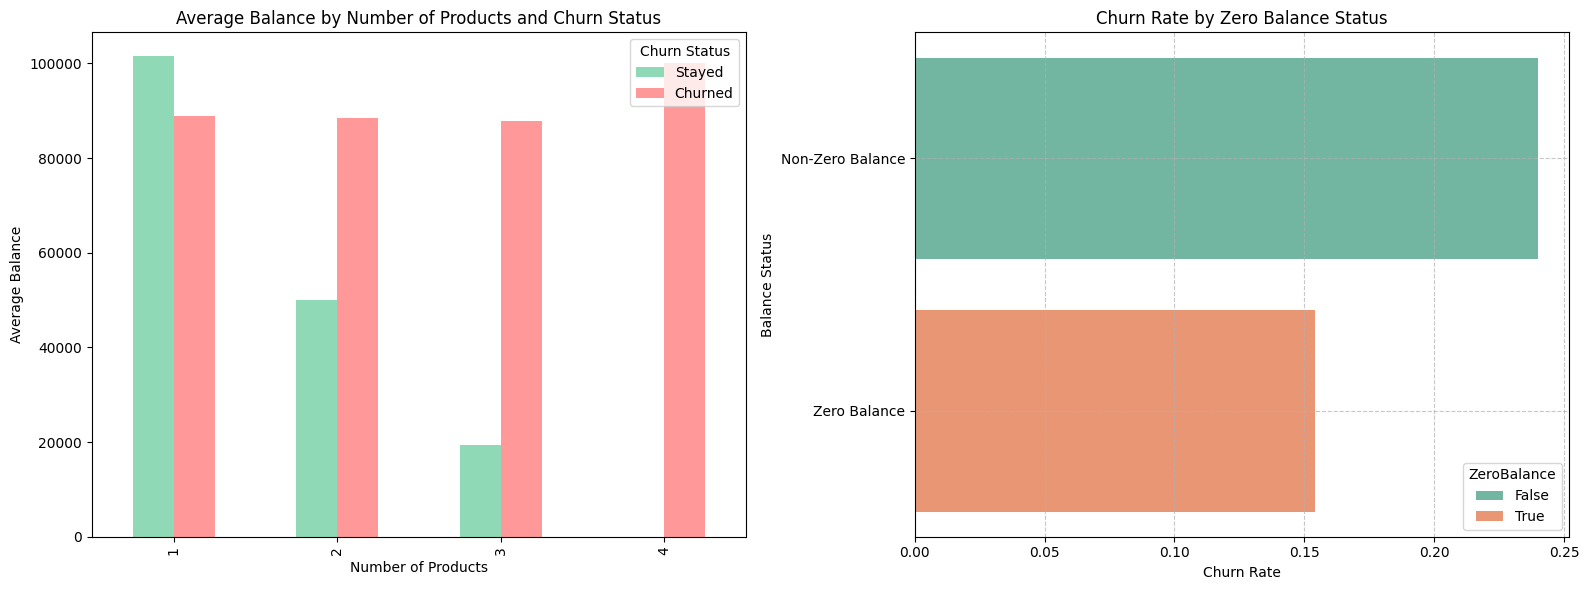

In [18]:
# ! Objective 6: To analyze the relationship between balance and the number of products held by customers, and how these factors relate to churn.

# Combined Analysis: Balance and Number of Products

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average Balance by Number of Products and Churn Status

pivot_data = df.pivot_table(index='NumOfProducts', columns='Exited', values='Balance', aggfunc='mean')
pivot_data.columns = ['Stayed', 'Churned']
pivot_data.plot(kind='bar', color=['#8fd9b6', '#ff9999'], ax=axes[0])

axes[0].set_title('Average Balance by Number of Products and Churn Status')
axes[0].set_xlabel('Number of Products')
axes[0].set_ylabel('Average Balance')
axes[0].legend(title='Churn Status', loc='upper right')

# Plot 2: Churn Rate by Zero Balance Status

df['ZeroBalance'] = df['Balance'] == 0
zero_balance_churn = df.groupby('ZeroBalance')['Exited'].mean().reset_index()

sns.barplot(x='Exited', y='ZeroBalance', hue='ZeroBalance', data=zero_balance_churn, palette='Set2', orient='h', ax=axes[1])

axes[1].set_title('Churn Rate by Zero Balance Status')
axes[1].set_ylabel('Balance Status')
axes[1].set_xlabel('Churn Rate')
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['Non-Zero Balance', 'Zero Balance'])
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [19]:
df.to_csv("../data/cleaned_churn_data.csv", index=False)
